# **DATA MINING COURSE - ENSEMBLE METHODS**

---

#### Digits dataset: Load and prep-process of the data

In [3]:
import pandas as pd
from sklearn.datasets import load_digits 
digits = load_digits() # load didgit dataset

In [4]:
dir(digits) # check column names

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

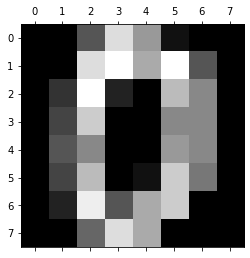

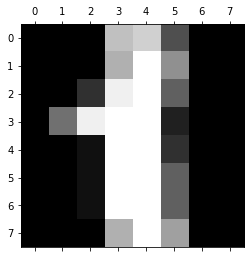

In [6]:
plt.gray() # plot two images
for i in range(2):
    plt.matshow(digits.images[i]) 

In [7]:
df = pd.DataFrame(digits.data) # create a df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['target'] = digits.target # create a target 

In [9]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [10]:
X = df.drop('target',axis='columns') # drop the target from df
y = df.target

#### Train and Test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Train using stand alone model (DecisionTreeClassifier)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_predicted = model.predict(X_test)

In [14]:
model.score(X_test, y_test)

0.8527777777777777

Text(69.0, 0.5, 'Truth')

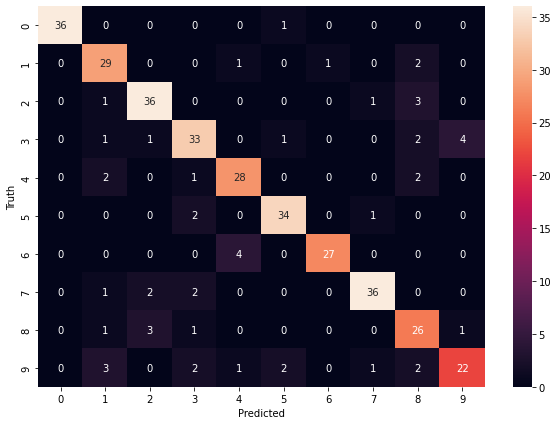

In [15]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.76      0.88      0.82        33
           2       0.86      0.88      0.87        41
           3       0.80      0.79      0.80        42
           4       0.82      0.85      0.84        33
           5       0.89      0.92      0.91        37
           6       0.96      0.87      0.92        31
           7       0.92      0.88      0.90        41
           8       0.70      0.81      0.75        32
           9       0.81      0.67      0.73        33

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



##### Train classifier using cross-validation

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = cross_val_score(DecisionTreeClassifier(), X, y, cv=40)
model

array([0.8       , 0.8       , 0.84444444, 0.8       , 0.86666667,
       0.88888889, 0.88888889, 0.84444444, 0.86666667, 0.8       ,
       0.82222222, 0.91111111, 0.88888889, 0.86666667, 0.86666667,
       0.8       , 0.75555556, 0.75555556, 0.82222222, 0.84444444,
       0.93333333, 0.97777778, 0.88888889, 0.86666667, 0.88888889,
       0.88888889, 0.84444444, 0.82222222, 0.93333333, 0.93333333,
       0.93333333, 0.91111111, 0.88888889, 0.84444444, 0.77777778,
       0.77777778, 0.8       , 0.84090909, 0.84090909, 0.86363636])

In [26]:
model.mean()

0.8547474747474748

#### Train using Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.942936673625609

In [ ]:
bag_model.score(X_test, y_test)

0.9555555555555556

#### Train using Bagging and cross-val

In [28]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

array([0.91388889, 0.88611111, 0.93593315, 0.93871866, 0.8913649 ])

In [29]:
scores.mean()

0.9132033426183843

#### Train using Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [31]:
model.score(X_test, y_test)

0.975

##### Confusion Matrix

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 1,  2,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  1,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  2, 36]])

Text(69.0, 0.5, 'Truth')

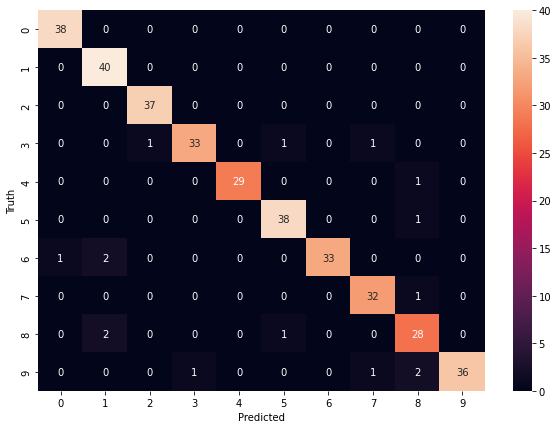

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')